Spread terms in statistics like range,IQR(Inter Quartile Range),Variance,Standard deviation and standard error will be calculated and explored in this notebook

In [3]:
import pandas as pd 
df = pd.read_csv('Titanic-Dataset.csv') # loading the dataset 
df.head() # displaying the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Range of the 'Age' column 
age_range = df['Age'].max()-df['Age'].min() 
float(age_range)

79.58

In [5]:
# Range of the 'Fare' column 
fare_range = df['Fare'].max()-df['Fare'].min() 
float(fare_range) 

512.3292

<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

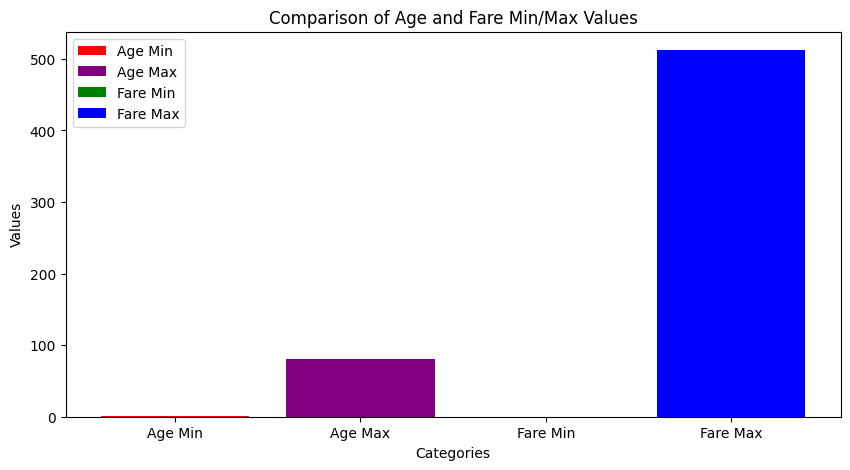

In [4]:
# Visualizing the comparison of the 'Age' and 'Fare' columns based on thier min and max values 
from matplotlib import pyplot as plt
categories = ['Age Min','Age Max','Fare Min','Fare Max'] 
values = [df['Age'].min(),df['Age'].max(),df['Fare'].min(),df['Fare'].max()] 
plt.figure(figsize=(10,5)) 
plt.bar(categories, values, color=['red', 'purple', 'green', 'blue'])
plt.bar(categories[0], values[0], color='red', label='Age Min')
plt.bar(categories[1], values[1], color='purple', label='Age Max')
plt.bar(categories[2], values[2], color='green', label='Fare Min')
plt.bar(categories[3], values[3], color='blue', label='Fare Max')
plt.xlabel('Categories') 
plt.ylabel('Values') 
plt.title('Comparison of Age and Fare Min/Max Values')
plt.legend()
plt

The open unoccupied spaces between the min and max of age and fare can be quantified as ranges

In [17]:
# Calculation of interquartile range - 'Age column' 
sorted_age = df['Age'].sort_values() 
iqr_age = sorted_age.quantile(0.75) - sorted_age.quantile(0.25) 
float(iqr_age)

17.875

In [18]:
# Calculation of interquartile range - 'Fare column'
sorted_fare = df['Fare'].sort_values() 
iqr_fare = sorted_fare.quantile(0.75)-sorted_fare.quantile(0.25) 
float(iqr_fare)

23.0896

<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

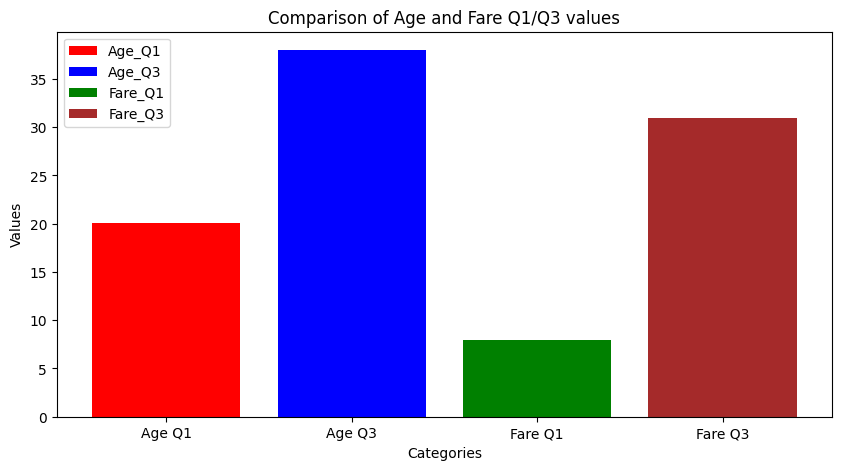

In [22]:
# Visualizing the comparison of the 'Age' and 'Fare' columns based on thier Q3 and Q1 values 
categories_iqr = ['Age Q1','Age Q3','Fare Q1','Fare Q3'] 
values_iqr = [sorted_age.quantile(0.25),sorted_age.quantile(0.75),sorted_fare.quantile(0.25),sorted_fare.quantile(0.75)] 
plt.figure(figsize=(10,5)) 
plt.bar(categories_iqr,values_iqr,color=['red','purple','green','blue']) 
plt.bar(categories_iqr[0],values_iqr[0],color='red',label = 'Age_Q1') 
plt.bar(categories_iqr[1],values_iqr[1],color='blue',label = 'Age_Q3') 
plt.bar(categories_iqr[2],values_iqr[2],color='green',label = 'Fare_Q1') 
plt.bar(categories_iqr[3],values_iqr[3],color='brown',label = 'Fare_Q3') 
plt.xlabel('Categories') 
plt.ylabel('Values') 
plt.title('Comparison of Age and Fare Q1/Q3 values') 
plt.legend() 
plt

The open unoccupied spaces between the Q1 and Q3 of age and fare can be quantified as IQR(Inter Quartile Ranges)

In [24]:
# Calculation of variance - 'Age column' 
age_variance = df['Age'].var() 
float(age_variance)

211.01912474630802

In [8]:
# Calculating the variance - 'Age column' with degree of freedom as 1 
age_variance_dof1 = df['Age'].var(ddof=1) 
float(age_variance_dof1)

211.01912474630802

In [10]:
# Calculation of variance - 'Fare column' 
fare_variance = df['Fare'].var() 
float(fare_variance)  

2469.436845743116

In [11]:
# Calculation of variance - 'Fare column' with degree of freedom as 1 
fare_variance_dof1 = df['Fare'].var(ddof=1) 
float(fare_variance_dof1)

2469.436845743116

In [30]:
# Standard deviation - 'Age column' 
age_std_dev = df['Age'].std() 
float(age_std_dev)

14.526497332334042

In [31]:
# Standard deviation - 'Fare column' 
fare_std_dev = df['Fare'].std() 
float(fare_std_dev)

49.6934285971809

<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

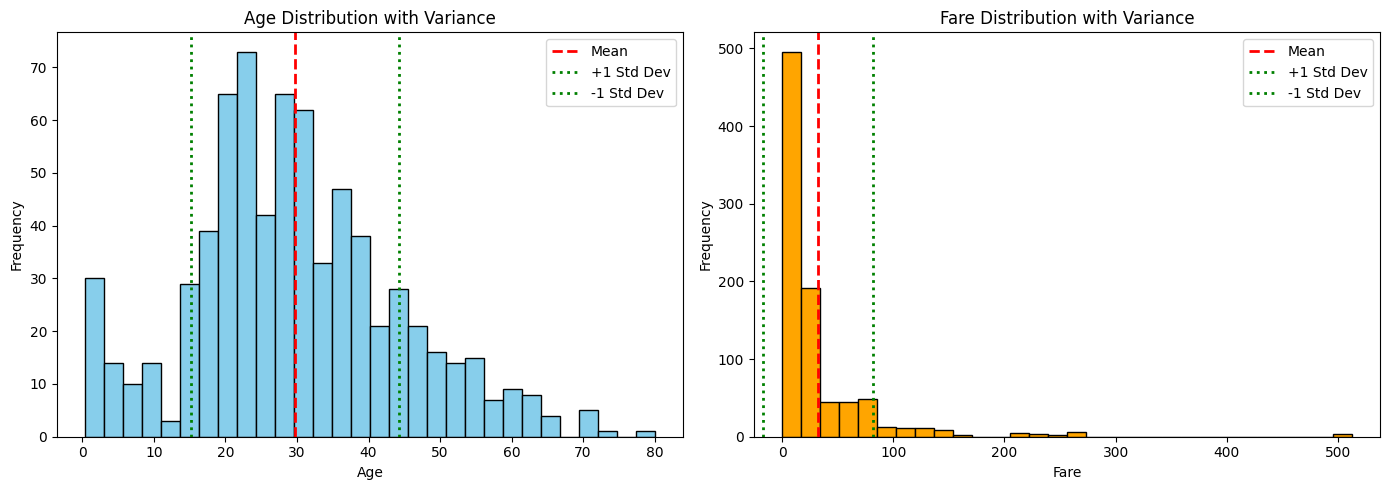

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
mean_age = df['Age'].mean()
std_age = df['Age'].std()
axes[0].axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[0].axvline(mean_age + std_age, color='green', linestyle='dotted', linewidth=2, label='+1 Std Dev')
axes[0].axvline(mean_age - std_age, color='green', linestyle='dotted', linewidth=2, label='-1 Std Dev')
axes[0].set_title('Age Distribution with Variance')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[1].hist(df['Fare'].dropna(), bins=30, color='orange', edgecolor='black')
mean_fare = df['Fare'].mean()
std_fare = df['Fare'].std()
axes[1].axvline(mean_fare, color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[1].axvline(mean_fare + std_fare, color='green', linestyle='dotted', linewidth=2, label='+1 Std Dev')
axes[1].axvline(mean_fare - std_fare, color='green', linestyle='dotted', linewidth=2, label='-1 Std Dev')
axes[1].set_title('Fare Distribution with Variance')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].legend()
plt.tight_layout() 
plt

The above plot shows that age distribution has minimal variance with less variability on the initial phase and more variability on the middle phase followed by minimal variability on the final phase. It indicates fewer generational gaps between the people on titanic
Whereas the fare distrinution shows that there is high variability on the starting phase with major decline as it progresses into middle stage followed by a little rise in the last stage. This indicates that the ticket prices are uneven for people and requires attention of the management. 


<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

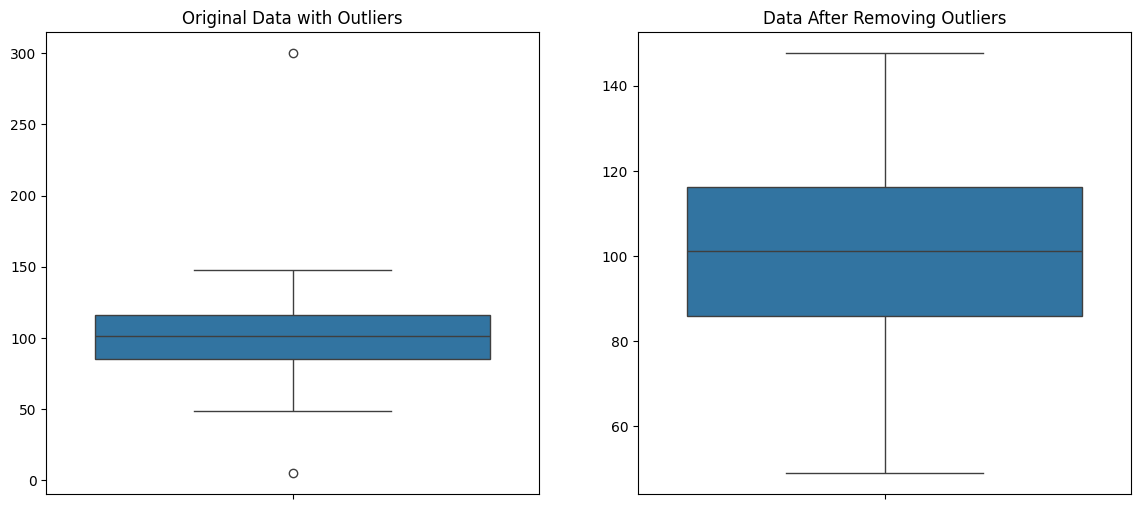

In [6]:
# Removal of outliers using IQR 
import numpy as np
import seaborn as sb
np.random.seed(0)
data = np.random.normal(100, 20, 200)
data = np.append(data, [300, 5])  # Adding potential outliers

# Calculating IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Defining the outlier criteria (1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Removing outliers
data_no_outliers = data[~outliers]

# Plotting the original data with outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sb.boxplot(data=data)
plt.title('Original Data with Outliers')

# Plotting the data after removing outliers
plt.subplot(1, 2, 2)
sb.boxplot(data=data_no_outliers)
plt.title('Data After Removing Outliers')

plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Sakriya Pyakurel\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

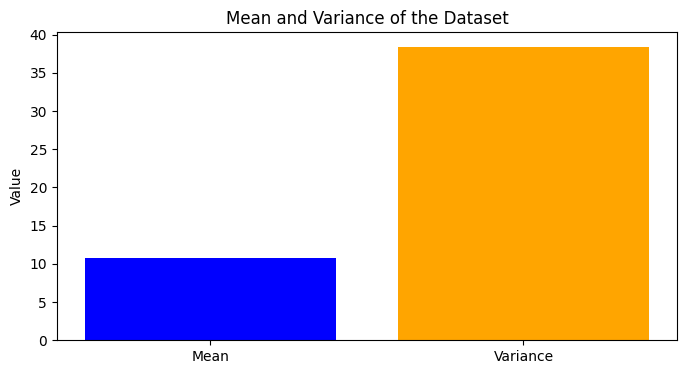

In [7]:
# Plotting and visualizing the mean and variance of a dataset
# Sample dataset
data = np.array([3,4,5,8,10,12,15,22,18])

# Calculate the mean and variance
mean = np.mean(data)
variance = np.var(data)

# Plotting
plt.figure(figsize=(8, 4))
plt.title("Mean and Variance of the Dataset")
plt.bar(['Mean', 'Variance'], [mean, variance], color=['blue', 'orange'])
plt.ylabel('Value')
plt